<a href="https://colab.research.google.com/github/sandeepsingh61935/abnormal-event-detection/blob/main/Abnormal_Event_detection_ipynb_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Importing libraries**

In [2]:
import os #provides functions to interact with file system
import cv2 #openCV library
import numpy as np #array processing package in python
import matplotlib.pyplot as plt #use to plot graphs
import shutil #offers high level operations on files and collection of files
import sys #provides information about constants, functions and methods
print(sys.version)
#from PIL import Image
#from keras.preprocessing.image import img_to_array,load_img

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


**Changing directory to Major Project directory**

In [4]:
print(os.getcwd())
os.chdir('drive/My Drive/Major Project')
print(os.getcwd())

/content


FileNotFoundError: ignored

In [ ]:
print(os.listdir())

['Avenue Dataset', 'UCSDped1', 'TestingData1', 'TestingData2', 'TestingData3', 'TestingData4', 'TestingData5', 'TestingData6', 'TestingData7', 'TestingData8', 'TestingData9', 'TestingData10', 'TestingData11', 'TestingData12', 'TestingData13', 'TestingData14', 'TestingData15', 'TestingData16', 'TestingData17', 'TestingData18', 'TestingData19', 'TestingData20', 'TestingData21', 'TrainingData1', 'TrainingData2', 'TrainingData3', 'TrainingData4', 'TrainingData5', 'TrainingData6', 'TrainingData7', 'TrainingData8', 'TrainingData9', 'TrainingData10', 'TrainingData11', 'TrainingData12', 'TrainingData13', 'TrainingData14', 'TrainingData15', 'TrainingData16', 'AnomalyDetector.h5']


**Convert each training video to sequence of frames**

In [ ]:
def createTrainingDataPerVideo( i ):
  currentframe = 0
  count = 0
  try:
    # creating a folder named TrainingData1
    if not os.path.exists( 'TrainingData'+ str(i) ):
      os.makedirs( 'TrainingData' + str(i) )
    # if not created then raise error
  except OSError:
      print ('Error: Creating directory of data')
  videoPath = "Avenue Dataset/training_videos/{}.avi".format(i)
  # Create VideoCapture object to capture a video from specified path.
  cam = cv2.VideoCapture(videoPath)
  # frames extraction from video
  while(True):
    # Sets position of video file to read every frame after 120 ms or 0.12 s.
    cam.set(cv2.CAP_PROP_POS_MSEC,(currentframe*120))
    # Capture frame by frame...ret stores true if frame is read, otherwise false
    ret,frame = cam.read()
    if ret:
        # if video is still left continue creating images
        name = './TrainingData' + str(i) + '/frame' + str(count) + '.jpg'
        print ('Creating...' + name)

        # write extracted images to current directory
        cv2.imwrite(name, frame)

        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
        count += 1
    else:
        break
    # Release all space and windows once done
  cam.release()
  cv2.destroyAllWindows()

**Create Training data**

In [ ]:
def createTrainingData():
  for k in range(1,17):
    createTrainingDataPerVideo(k)
createTrainingData()
print('Training Data Created')

**Preprocessing of training data i.e., resize, rgb to gray, Normalization**

In [ ]:
def getTrainingData():
  imagestore = []
  for k in range(1,17):
    framepath = 'TrainingData'+str(k)
    images = os.listdir(framepath)
    print(len(images))
    for image in images:
      image_path=framepath+ '/'+ image
      img = cv2.imread(image_path)
      img = cv2.resize(img,(227,227))
      #plt.imshow(img)
      #Convert the Image to Grayscale
      gray = 0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]
      plt.imshow(gray, cmap = 'gray')
      imagestore.append(gray)
  print(len(imagestore))
  imagestore_array = np.array(imagestore)
  a,b,c=imagestore_array.shape
  print(a,b,c)
  #Reshape to (227,227,batch_size)
  imagestore_array.resize(b,c,a)
  print(imagestore_array.shape)
  #Normalize
  imagestore_array_normalize=(imagestore_array-imagestore_array.mean())/(imagestore_array.std())
  #Clip negative Values
  imagestore_clip=np.clip(imagestore_array_normalize,0,1)
  return imagestore_clip

**Create spatio-temporal autoencoder model**

In [ ]:
from keras.layers import Conv3D,ConvLSTM2D,Conv3DTranspose
from keras.models import Sequential
def lo_model():
  model=Sequential()
  model.add(Conv3D(filters=128,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',input_shape=(227,227,10,1),activation='tanh'))
  model.add(Conv3D(filters=64,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))
  model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,padding='same',dropout=0.4,recurrent_dropout=0.3,return_sequences=True))
  model.add(ConvLSTM2D(filters=32,kernel_size=(3,3),strides=1,padding='same',dropout=0.3,return_sequences=True))
  model.add(ConvLSTM2D(filters=64,kernel_size=(3,3),strides=1,return_sequences=True, padding='same',dropout=0.5))
  model.add(Conv3DTranspose(filters=128,kernel_size=(5,5,1),strides=(2,2,1),padding='valid',activation='tanh'))
  model.add(Conv3DTranspose(filters=1,kernel_size=(11,11,1),strides=(4,4,1),padding='valid',activation='tanh'))
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
  return model

**Train model over training data to learn the video sequences**

455
504
496
504
272
504
367
339
464
408
261
49
122
170
118
82
5115
5115 227 227
(227, 227, 5115)
(511, 227, 227, 10, 1)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model has been loaded
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 408 samples, validate on 103 samples
Epoch 1/100





408/408 [==============================] - 116s 285ms/step - loss: 0.1207 - acc: 0.6722 - val_loss: 0.0873 - val_acc: 0.7092
Epoch 2/100
408/408 [==============================] - 107s 263ms/step - loss: 0.0791 - acc: 0.7298 - val_loss: 0.0819 - val_acc: 0.7152
Epoch 3/100
408/408 [==============================] - 107s 263ms/step - loss: 0.0765 - acc: 0.7325 - val_loss: 0.0811 - val_acc: 0.7163
Epoch 4/100
408/408 [==============================] - 107s 262ms/step - loss: 0.0754 - acc: 0.7335 - val_loss: 0.0806 - val_acc: 0.7174
Epoch 5/100
408/408 [=====================

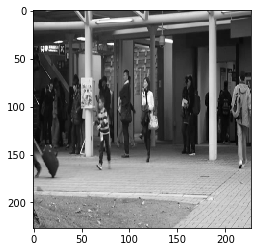

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
X_train = getTrainingData()
frames = X_train.shape[2]
#Need to make number of frames divisible by 10
frames = frames-frames%10
X_train = X_train[:,:,:frames]
X_train = X_train.reshape(-1,227,227,10)
X_train = np.expand_dims(X_train,axis=4)
print(X_train.shape)
Y_train = X_train.copy()
epochs = 100
#args.n_epochs
batch_size = 1
if __name__=="__main__":
  model=lo_model()
  #model.save('mymodel.h5')
  callback_save = ModelCheckpoint('AnomalyDetector.h5',monitor='val_loss', save_best_only=True)
  callback_early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  print('Model has been loaded')
  model.fit(X_train,Y_train,
			  batch_size=batch_size,
			  epochs=epochs,
			  callbacks = [callback_save,callback_early_stopping],
        validation_split=0.2
)
  #batch_size=Number of samples per gradient update

**Creating frames from testing video**

In [ ]:
def createTestingDataPerVideo( x ):
  try:
    # creating a folder named data
    if not os.path.exists('TestingData'+str(x)):
      os.makedirs('TestingData'+ str(x))
    # if not created then raise error
  except OSError:
    print ('Error: Creating directory of TestingData')
    # frame
  currentframe = 0
  count = 0
  videoPath = "Avenue Dataset/testing_videos/{}.avi".format(x)
  cam = cv2.VideoCapture(videoPath)
  while(True):
    # reading from frame
    cam.set(cv2.CAP_PROP_POS_MSEC,(currentframe*120))
    ret,frame = cam.read()
    if ret:
      print(ret)
      # if video is still left continue creating images
      name = './TestingData' + str(x) + '/frame' + str(count) + '.jpg'
      print ('Creating...' + name)
      # writing the extracted images
      cv2.imwrite(name, frame)
      # increasing counter so that it will
      # show how many frames are created
      currentframe += 1
      count += 1
    else:
      break
  # Release all space and windows once done
  cam.release()
  cv2.destroyAllWindows()

**Create testing data**

In [ ]:
def createTestingData():
  for k in range(1,22):
    createTestingDataPerVideo(k)
createTestingData()
print('Testing data created')

**Preprocessing of testing data**

In [ ]:
def funn( a, x ):
  teststore=[]
  framepath = a + str(x)
  images = os.listdir(framepath)
  print(len(images))
  for image in images:
    image_path=framepath+ '/'+ image
    img = cv2.imread(image_path)
    img = cv2.resize(img,(227,227))
    #Convert the Image to Grayscale
    gray = 0.2989*img[:,:,0] + 0.5870*img[:,:,1] + 0.1140*img[:,:,2]
    teststore.append(gray)
  teststore_array = np.array(teststore)
  a,b,c=teststore_array.shape
  #Reshape to (227,227,batch_size)
  teststore_array.resize(b,c,a)
  #Normalize
  teststore_array_normalize=(teststore_array-teststore_array.mean())/(teststore_array.std())
  #Clip negative Values
  teststore_clip=np.clip(teststore_array_normalize,0,1)
  return teststore_clip

**Calculation of reconstruction error**

In [ ]:
def mean_squared_loss(x1,x2):
	''' Compute Euclidean Distance Loss  between
	input frame and the reconstructed frame'''
	diff=x1-x2
	a,b,c,d,e=diff.shape
	n_samples=a*b*c*d*e
	sq_diff=diff**2
	Sum=sq_diff.sum()
	dist=np.sqrt(Sum)
	mean_dist=dist/n_samples
	return mean_dist




**Testing done over both training and testing videos**

In [ ]:
trainVector = []

**Testing over abnormal videos**

In [ ]:
from keras.models import load_model
for k in range(1, 22):
  threshold=0.00046
  model = load_model('AnomalyDetector.h5')
  X_test = funn('TestingData', k)
  frames = X_test.shape[2]
  #Need to make number of frames divisible by 10
  flag = 0 #Overall video flag
  frames = frames-frames%10
  X_test = X_test[:,:,:frames]
  X_test = X_test.reshape(-1,227,227,10)
  X_test = np.expand_dims(X_test,axis=4)
  for number,bunch in enumerate(X_test):
    n_bunch=np.expand_dims(bunch,axis=0)
    reconstructed_bunch=model.predict(n_bunch)
    loss=mean_squared_loss(n_bunch,reconstructed_bunch)
    if loss>threshold:
      #print("Anomalous bunch of frames at bunch number {} = {}".format(number,loss))
      flag=1
    #else:
      #print("Non Anomalous bunch of frames at bunch number {} = {}".format(number,loss))
  if flag == 1:
    print('Testing {} has anomalous activity'.format(k))
    trainVector.append(1)
  else:
    trainVector.append(0)

480
Testing 1 has anomalous activity
404
Testing 2 has anomalous activity
308
Testing 3 has anomalous activity
316
Testing 4 has anomalous activity
336
Testing 5 has anomalous activity
428
Testing 6 has anomalous activity
202
Testing 7 has anomalous activity
12
Testing 8 has anomalous activity
392
Testing 9 has anomalous activity
281
Testing 10 has anomalous activity
158
Testing 11 has anomalous activity
424
183
Testing 13 has anomalous activity
169
Testing 14 has anomalous activity
334
Testing 15 has anomalous activity
247
Testing 16 has anomalous activity
142
Testing 17 has anomalous activity
98
Testing 18 has anomalous activity
83
Testing 19 has anomalous activity
91
26
Testing 21 has anomalous activity


**Testing over normal videos**

In [ ]:
for k in range(1, 17):
  threshold=0.00046
  model = load_model('AnomalyDetector.h5')
  X_test = funn('TrainingData', k)
  frames = X_test.shape[2]
  #Need to make number of frames divisible by 10
  flag = 0 #Overall video flag
  frames = frames-frames  4)
  for number,bunch in enumerate(X_test):
    n_bunch=np.expand_dims(bunch,axis=0)
    reconstructed_bunch=model.predict(n_bunch)
    loss=mean_squared_loss(n_bunch,reconstructed_bunch)
    if loss>threshold:
      #print("Anomalous bunch of frames at bunch number {} = {}".format(number,loss))
      flag=1
    #else:
      #print("Non Anomalous bunch of frames at bunch number {} = {}".format(number,loss))
  if flag == 1:
    print('Training {} has anomalous activity'.format(k))
    trainVector.append(1)
  else:
    trainVector.append(0)

"""pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])"""


455
504
496
504
272
504
367
Training 7 has anomalous activity
339
Training 8 has anomalous activity
464
408
Training 10 has anomalous activity
261
49
Training 12 has anomalous activity
122
Training 13 has anomalous activity
170
118
Training 15 has anomalous activity
82
Training 16 has anomalous activity


'pr_auc = metrics.auc(recall, precision)\n\nplt.title("Precision-Recall vs Threshold Chart")\nplt.plot(thresholds, precision[: -1], "b--", label="Precision")\nplt.plot(thresholds, recall[: -1], "r--", label="Recall")\nplt.ylabel("Precision, Recall")\nplt.xlabel("Threshold")\nplt.legend(loc="lower left")\nplt.ylim([0,1])'

In [ ]:
trainVector=[1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1]

**Accuracy calculation by construction of confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
testVector = []
for i in range(1,22):
  testVector.append(1)
for i in range (1,17):
  testVector.append(0)
results = confusion_matrix(testVector, trainVector)
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(testVector, trainVector)) # testtVector is y_true trainVector i y_pred
print('Report : ')
print(classification_report(testVector, trainVector))

Confusion Matrix :
[[ 9  7]
 [ 2 19]]
Accuracy Score : 0.7567567567567568
Report : 
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.73      0.90      0.81        21

    accuracy                           0.76        37
   macro avg       0.77      0.73      0.74        37
weighted avg       0.77      0.76      0.75        37



**Regularity score calculation**

In [ ]:
from keras.models import load_model
def plotRegularityScore(data, x):
  model = load_model('AnomalyDetector.h5')
  sr = []
  sa = []
  X_test = funn(data, x)
  frames = X_test.shape[2]
  #Need to make number of frames divisible by 10
  flag = 0 #Overall video flag
  frames = frames-frames%10
  X_test = X_test[:,:,:frames]
  X_test = X_test.reshape(-1,227,227,10)
  X_test = np.expand_dims(X_test,axis=4)
  for number,bunch in enumerate(X_test):
    n_bunch=np.expand_dims(bunch,axis=0)
    reconstructed_bunch=model.predict(n_bunch)
    loss=mean_squared_loss(n_bunch,reconstructed_bunch)
    sa.append(loss)
  sa = (sa - np.min(sa)) / np.max(sa)
  sr = 1.0 - sa
  plt.plot(sr)
  plt.ylabel('Regularity Score Sr(t)')
  plt.xlabel('Frame Number(t)')
  plt.xticks(np.arange(0,30, 5))
  plt.yticks(np.arange(0.6, 1, 0.05))
  plt.show()

480


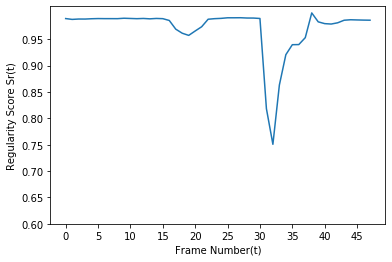

In [ ]:
plotRegularityScore('TestingData',1)

455


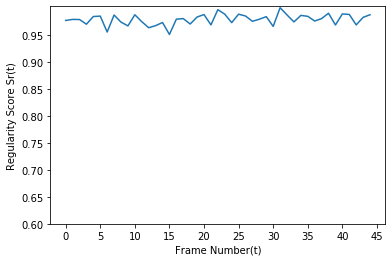

In [ ]:
plotRegularityScore('TrainingData', 1)

316


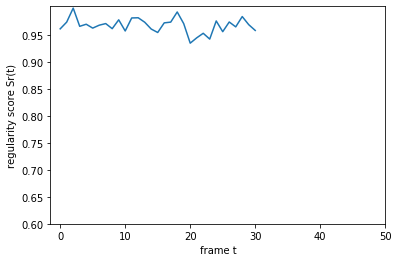

In [ ]:
plotRegularityScore('TestingData', 4)

202


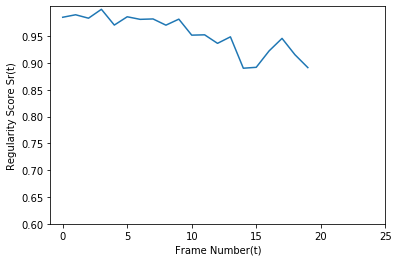

In [ ]:
plotRegularityScore('TestingData', 7)

496


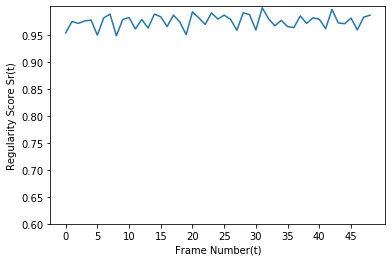

In [ ]:
plotRegularityScore('TrainingData', 3)

169


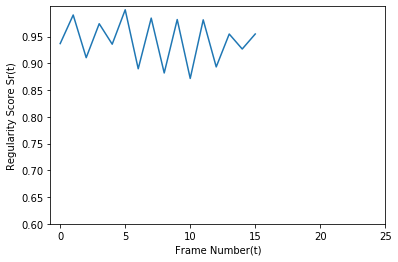

In [ ]:
plotRegularityScore('TestingData', 14)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


334


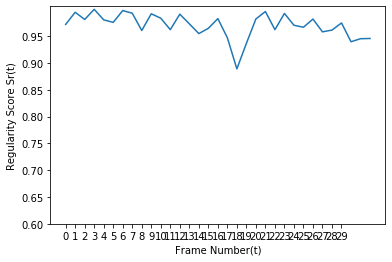

In [ ]:
plotRegularityScore('TestingData', 15)

247


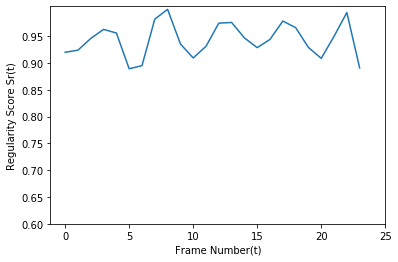

In [ ]:
plotRegularityScore('TestingData', 16)

In [ ]:
from keras import models
from keras.models import load_model
model = load_model('AnomalyDetector.h5')
layer_outputs = [layer.output for layer in model.layers[:7]] # Extracts the outputs of the top 7 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [ ]:
X = funn('TrainingData', 1)
frames = X.shape[2]
#Need to make number of frames divisible by 10
flag = 0 #Overall video flag
frames = frames-frames%10
X = X[:,:,:frames]
X = X.reshape(-1,227,227,10)
X = np.expand_dims(X,axis=4)

455


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 55, 55, 10, 128)   15616     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 26, 26, 10, 64)    204864    
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 26, 26, 10, 64)    295168    
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 26, 26, 10, 32)    110720    
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 26, 26, 10, 64)    221440    
_________________________________________________________________
conv3d_transpose_1 (Conv3DTr (None, 55, 55, 10, 128)   204928    
_________________________________________________________________
conv3d_transpose_2 (Conv3DTr (None, 227, 227, 10, 1)  

In [ ]:
activations = activation_model.predict(X) # Returns a list of five Numpy arrays: one array per layer activation

**Activation units visualization**

**Input sequence frame**

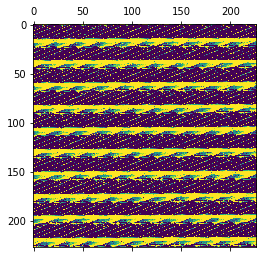

In [ ]:
plt.matshow(X[0,:,:,0,0], cmap='viridis')

**Activations of different layers**

**First Layer activation unit**


(45, 55, 55, 10, 128)


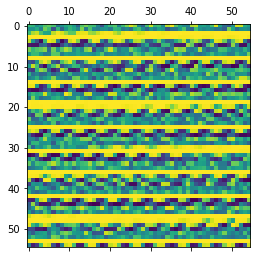

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :,0,0], cmap='viridis')

**Second layer activation unit**

(45, 26, 26, 10, 64)


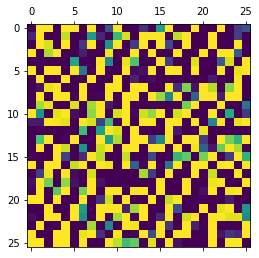

In [ ]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)
plt.matshow(second_layer_activation[0, :, :,0,0], cmap='viridis')

**Third layer activation unit**

(45, 26, 26, 10, 64)


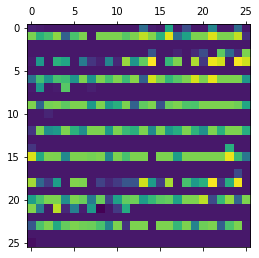

In [ ]:
third_layer_activation = activations[2]
print(third_layer_activation.shape)
plt.matshow(third_layer_activation[0, :, :,0,0], cmap='viridis')

**Fourth layer activation unit**

(45, 26, 26, 10, 32)


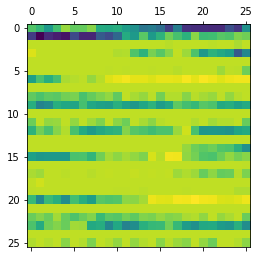

In [ ]:
fourth_layer_activation = activations[3]
print(fourth_layer_activation.shape)
plt.matshow(fourth_layer_activation[0, :, :,0,0], cmap='viridis')

**Fifth layer activation units**

(45, 26, 26, 10, 64)


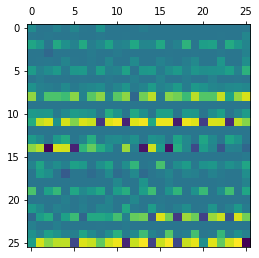

In [ ]:
fifth_layer_activation = activations[4]
print(fifth_layer_activation.shape)
plt.matshow(fifth_layer_activation[0, :, :,0,0], cmap='viridis')

**Sixth layer activation units**

(45, 55, 55, 10, 128)


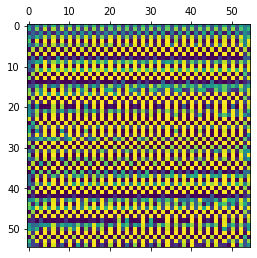

In [ ]:
sixth_layer_activation = activations[5]
print(sixth_layer_activation.shape)
plt.matshow(sixth_layer_activation[0, :, :,0,0], cmap='viridis')

**Final layer activation units**

(45, 227, 227, 10, 1)


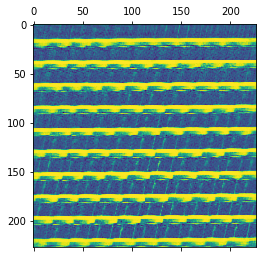

In [ ]:
final_layer_activation = activations[6]
print(final_layer_activation.shape)
plt.matshow(final_layer_activation[0, :, :,0,0], cmap='viridis')

**Features visualization**

**Features of conv layer**

**Features of first convolution layer**

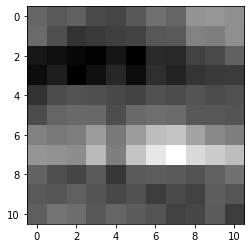

"\nfor i in range(n_filters):\n\t# get the filter\n\tf = filters[:, :, :, i]\n\t# plot each channel separately\n\tfor j in range(3):\n\t\t# specify subplot and turn of axis\n\t\tax = plt.subplot(n_filters, 3, ix)\n\t\tax.set_xticks([])\n\t\tax.set_yticks([])\n\t\t# plot filter channel in grayscale\n\t\tplt.imshow(f[:, :, :,:,j], cmap='gray')\n\t\tix += 1\n# show the figure\nplt.show()\n"

In [ ]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
f = filters[:, :, 0,0, 0]
#ax = plt.subplot(n_filters, 3, ix)
#ax.set_xticks([])
#ax.set_yticks([])
# plot filter channel in grayscale
plt.imshow(f, cmap='gray')
# show the figure
plt.show()

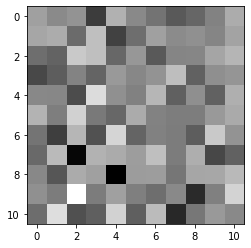

In [ ]:
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
f = filters[:, :, 0,0, 1]
#ax.set_xticks([])
#ax.set_yticks([])
# plot filter channel in grayscale
plt.imshow(f, cmap='gray')
# show the figure
plt.show()

**Features of second convolution layer**

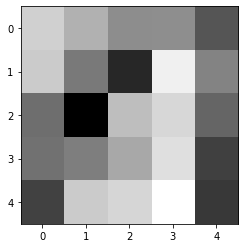

In [ ]:
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
f = filters[:, :, 0,0, 0]
#ax.set_xticks([])
#ax.set_yticks([])
# plot filter channel in grayscale
plt.imshow(f, cmap='gray')
# show the figure
plt.show()